In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_absolute_error,mean_squared_error




/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
company_name = ["AAPL","MSFT","AMZN"]
end_date =datetime.now()
start_date = end_date - timedelta(days=1080)


In [ ]:
company_data = {}
for symboles in company_name:
  df = yf.download(symboles, start_date,end=end_date)
  company_data[symboles]=df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-26,154.759995,156.121994,151.835007,154.646500,154.646500,85518000
2021-03-01,156.394501,157.477997,154.899506,157.307007,157.307007,54582000
2021-03-02,157.173492,158.175995,154.356003,154.726501,154.726501,51916000
2021-03-03,154.059006,155.389008,149.750000,150.250000,150.250000,79774000
2021-03-04,150.600006,152.906494,147.271500,148.878494,148.878494,109632000
...,...,...,...,...,...,...
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100


In [ ]:
company_model = {}
for symboles,df in company_data.items():
  df = df.copy()
  df['Target'] = df['Close'].shift(-1)
  df.dropna(inplace=True)
  x = df[['Close']].values
  y = df[['Target']].values
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2 ,random_state=42)
  model = LinearRegression()
  model.fit(x_train,y_train)
  company_model[symboles]=model

In [ ]:
for symbol,df in company_data.items():
  model = company_model[symbol]
  x_test = df[['Close']].tail(1)
  x_train = df[['Close']].tail(1)
  y_test = df['Close'].tail(1)  # True value for the last day
  y_pred = model.predict(x_test)

    # Calculate and print evaluation metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

print(f"Company: {symbol}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print("\n")


Company: AMZN
MAE: 0.18
MSE: 0.03
RMSE: 0.18




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


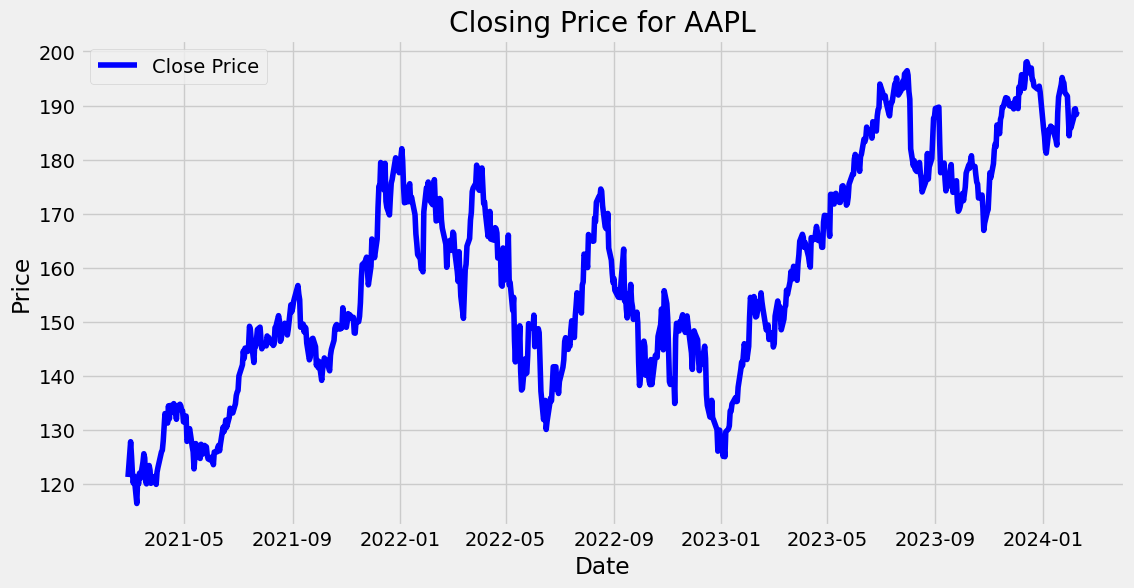

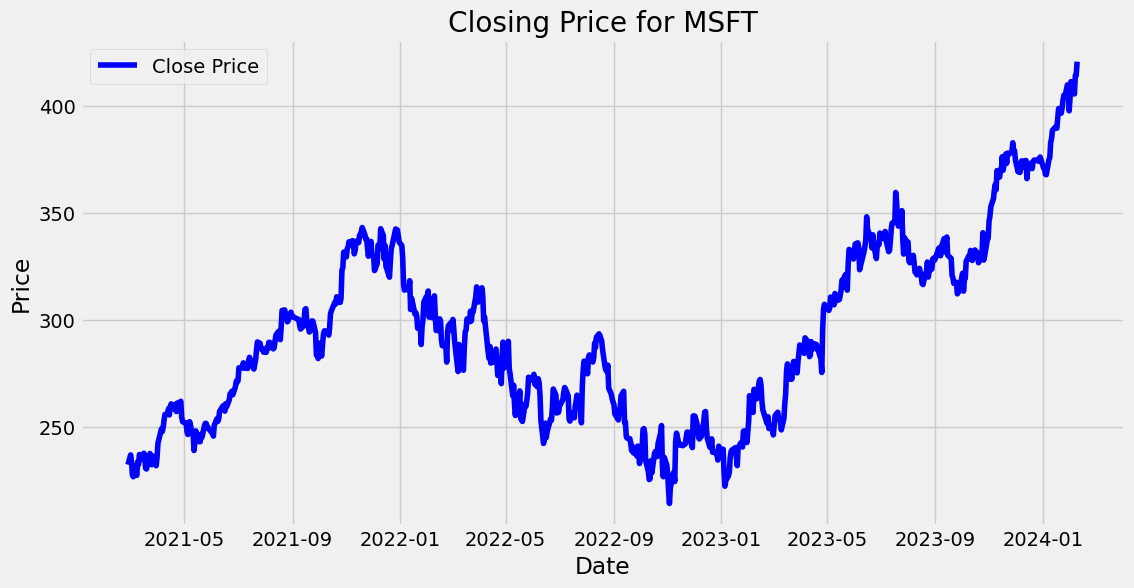

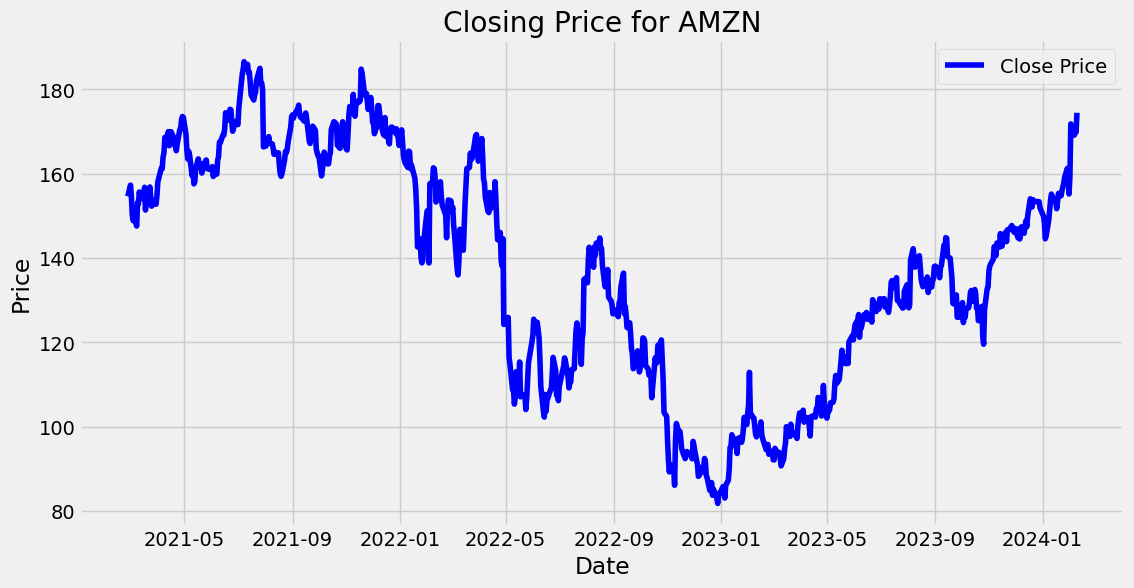

In [ ]:
for symbol, df in company_data.items():
  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df['Close'], label='Close Price', color='blue')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.title(f'Closing Price for {symbol}')
  plt.grid(True)
  plt.show()

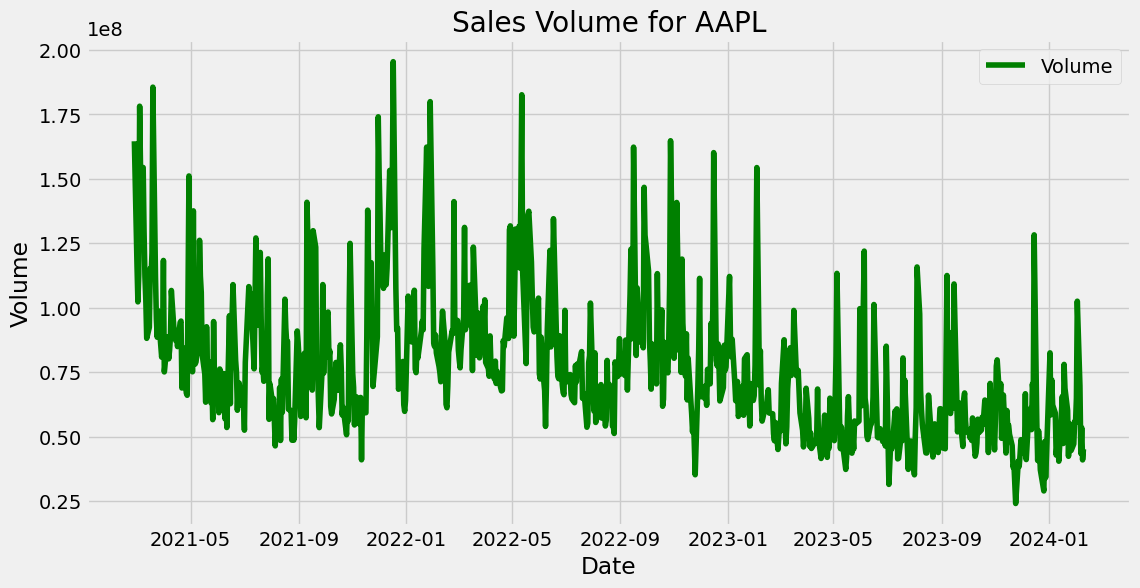

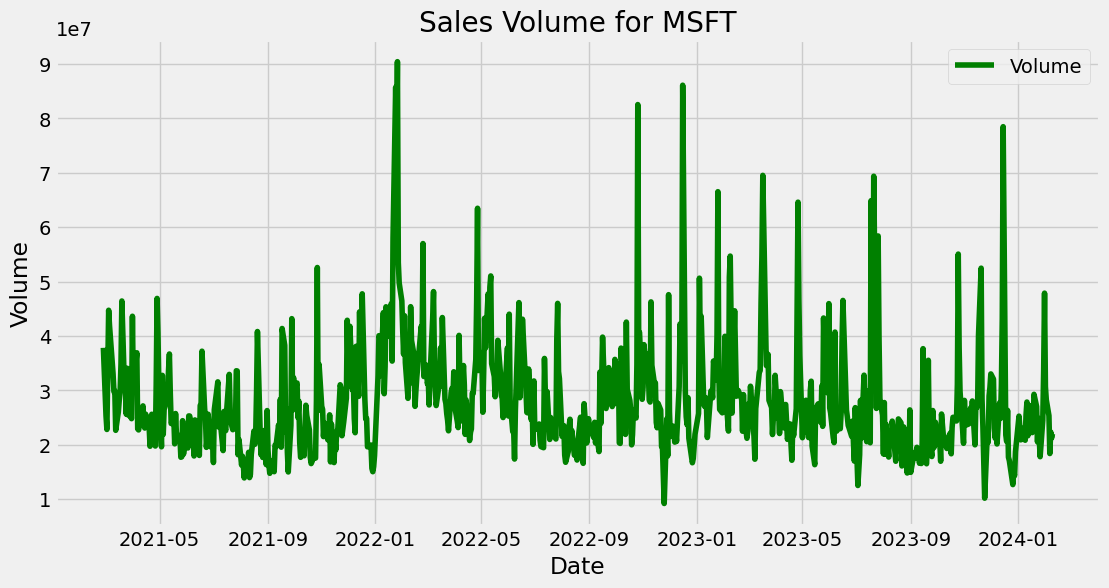

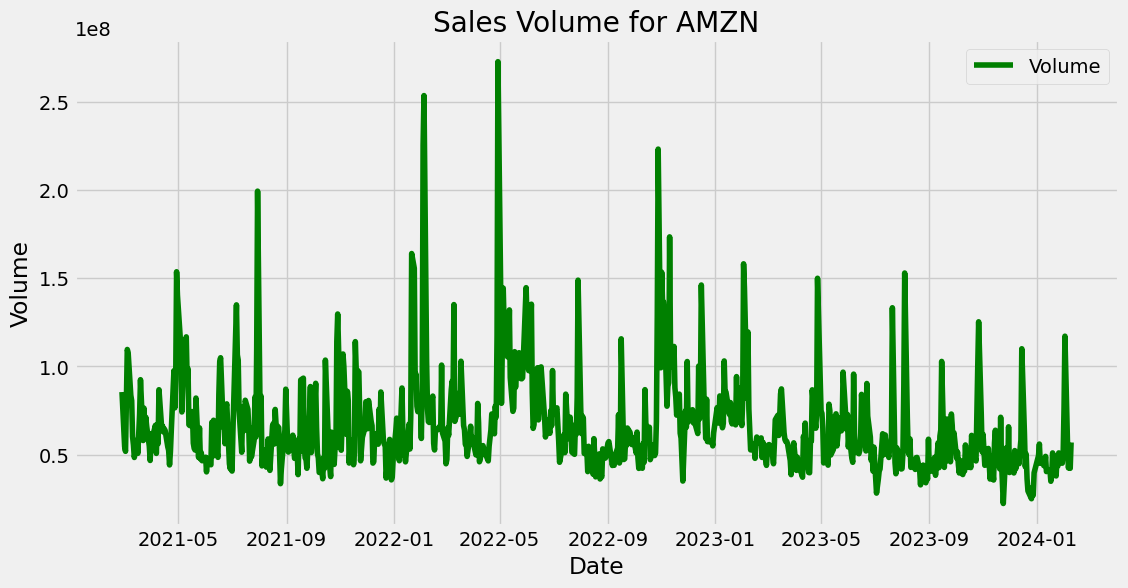

In [ ]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title(f'Sales Volume for {symbol}')
    plt.grid(True)
    plt.show()

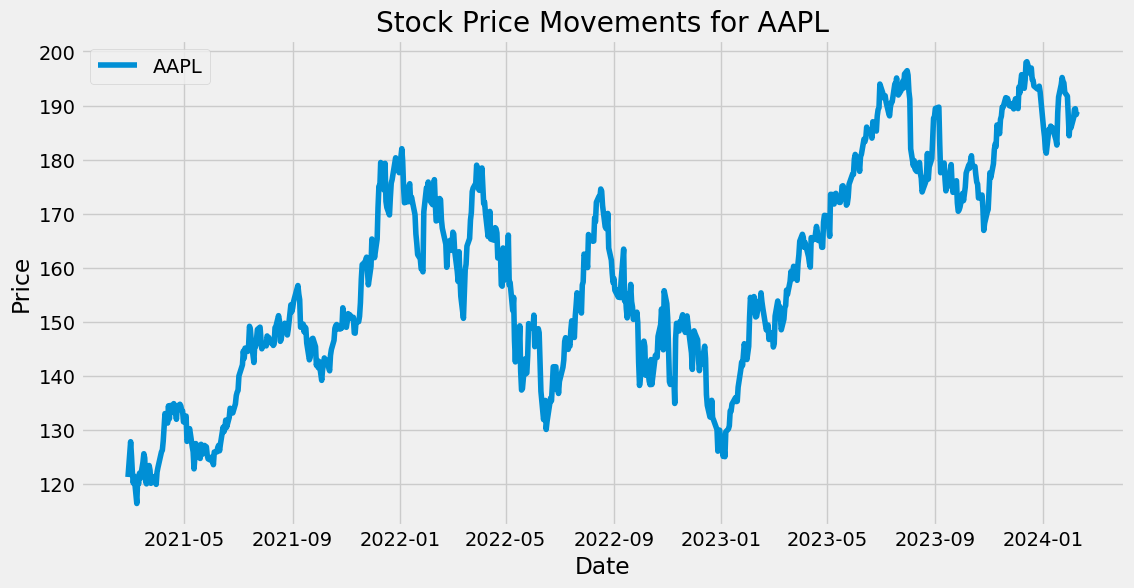

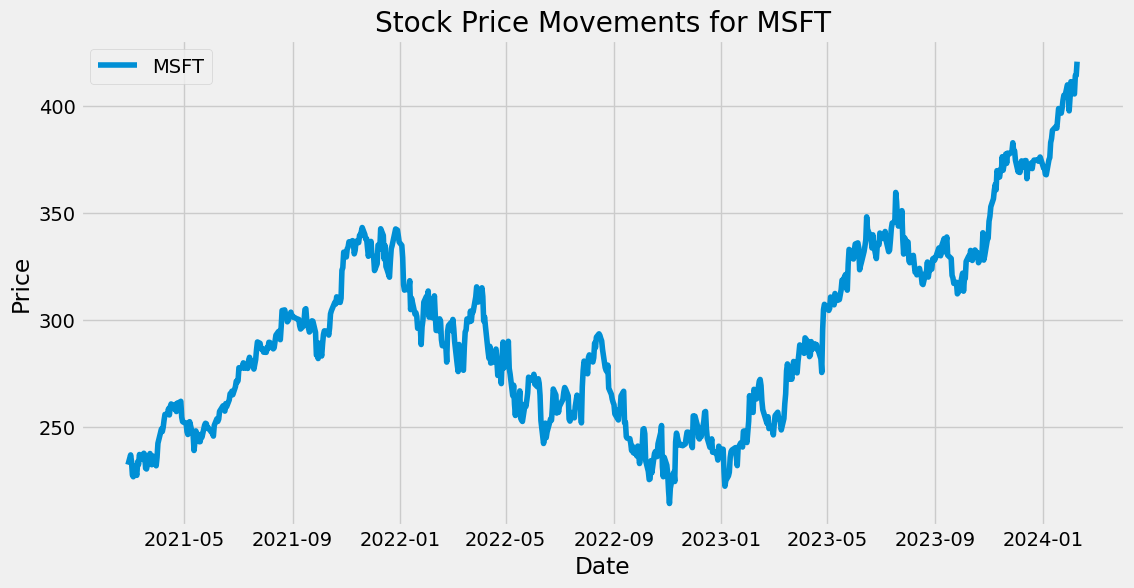

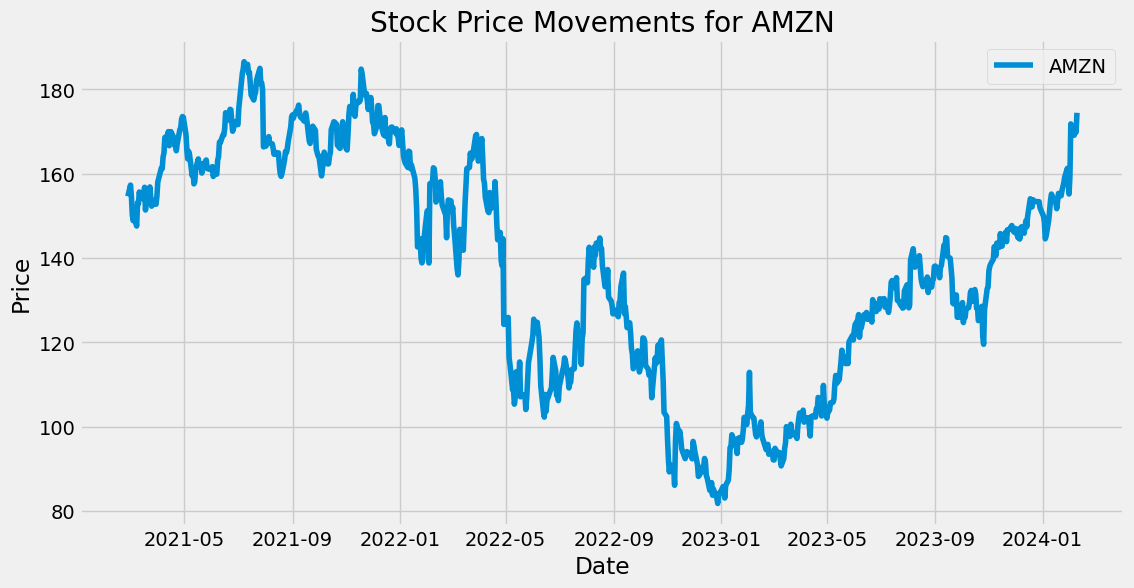

In [ ]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label=symbol)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Stock Price Movements for {symbol}')
    plt.grid(True)
    plt.show()

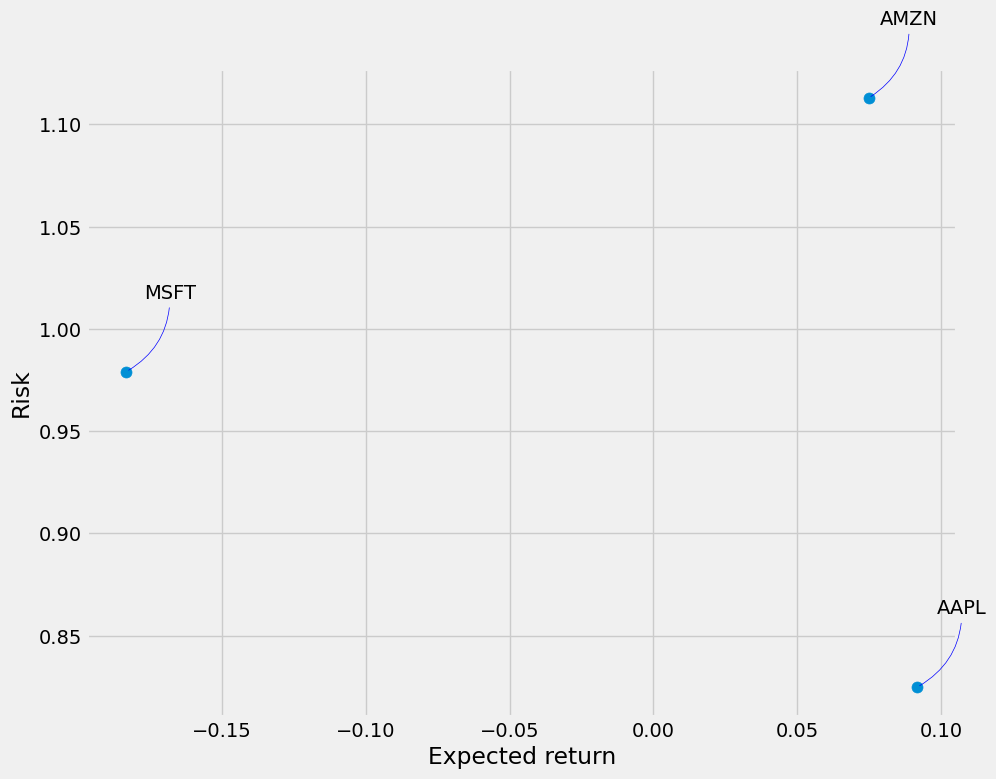

In [ ]:
# Generate random data as a placeholder for tech_rets
np.random.seed(42)
data = np.random.randn(100, 3)
tech_rets = pd.DataFrame(data, columns=['AAPL', 'MSFT', 'AMZN'])

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

In [ ]:
for symbol, model in company_model.items():
    latest_closing_price = company_data[symbol]['Close'].iloc[-1]
    latest_data = pd.DataFrame({'Close': [latest_closing_price]})
    predicted_price = model.predict(latest_data)
    print(f"Predicted Price for {symbol} on the next day: {predicted_price[0]}")

Predicted Price for AAPL on the next day: [188.66794038]
Predicted Price for MSFT on the next day: [420.62976404]
Predicted Price for AMZN on the next day: [174.26950596]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
